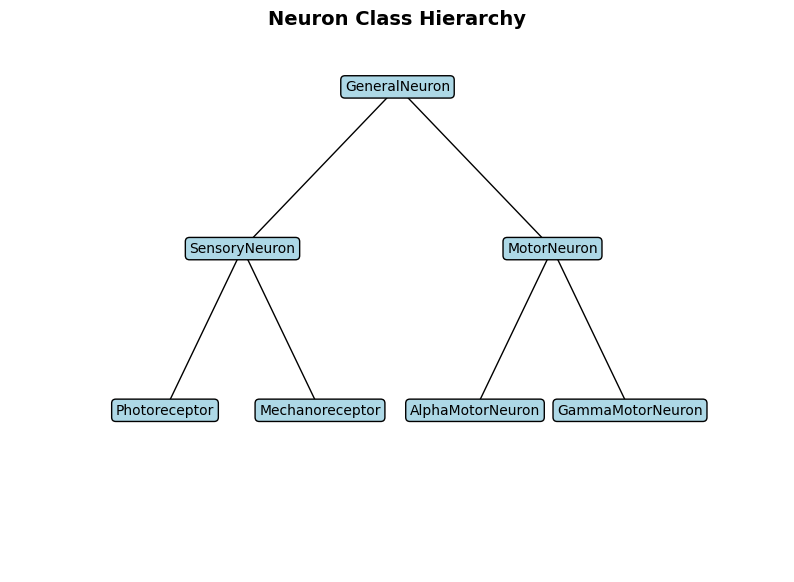

In [ ]:
#shahar pal 322868092
#class hierarchy diagram:
import matplotlib.pyplot as plt

# Coordinates for each class box
positions = {
    "GeneralNeuron": (5, 9),
    "SensoryNeuron": (3, 6),
    "MotorNeuron": (7, 6),
    "Photoreceptor": (2, 3),
    "Mechanoreceptor": (4, 3),
    "AlphaMotorNeuron": (6, 3),
    "GammaMotorNeuron": (8, 3)
}

# Connections between classes
connections = [
    ("GeneralNeuron", "SensoryNeuron"),
    ("GeneralNeuron", "MotorNeuron"),
    ("SensoryNeuron", "Photoreceptor"),
    ("SensoryNeuron", "Mechanoreceptor"),
    ("MotorNeuron", "AlphaMotorNeuron"),
    ("MotorNeuron", "GammaMotorNeuron")
]

# Plot the diagram
plt.figure(figsize=(10, 7))
for name, (x, y) in positions.items():
    plt.text(x, y, name, ha="center", va="center", fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightblue"))

# Draw the connections as lines
for parent, child in connections:
    parent_pos = positions[parent]
    child_pos = positions[child]
    plt.plot([parent_pos[0], child_pos[0]], [parent_pos[1], child_pos[1]], "k-", lw=1)

# Adjust plot limits and remove axes
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.axis("off")

# Title
plt.title("Neuron Class Hierarchy", fontsize=14, fontweight="bold")
plt.show()


In [15]:
#part 1 of the project.
#basic neuron- with basic properties. relevant to all kind of neurons.
class GeneralNeuron:
    #defualt value to firing rate.
    def __init__(self, firing_rate=0.0):
        self.firing_rate = firing_rate

    #according to stimulus strength.
    def activate(self, stimulus_strength):
        self.firing_rate = stimulus_strength * 0.1  # Example activation formula
        print(f"General Neuron activated with firing rate: {self.firing_rate}")


#build new class in general.
class SensoryNeuron(GeneralNeuron):
    def __init__(self, receptor_type, firing_rate=0.0):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus_strength):
        self.activate(stimulus_strength)


#this kinf of neurons responsible for muscle activity and movement with specific signals.
class MotorNeuron(GeneralNeuron):
    def __init__(self, target_muscle, firing_rate=0.0):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    #make response of the muscle
    def control_muscle(self):
        print(f"Motor neuron controlling {self.target_muscle} with firing rate: {self.firing_rate}")


# kind of sensory neuron who sensitive to light
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(receptor_type="light", firing_rate=firing_rate)

    def light_detection(self, light_intensity):
        # Assuming light_intensity is a number
        self.activate(stimulus_strength=light_intensity)


#kind of sensory neurons who respond to pressure
class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(receptor_type="pressure", firing_rate=firing_rate)

    def sense_stimulus(self, pressure_intensity):
        # Assuming pressure_intensity is a number
        self.activate(stimulus_strength=pressure_intensity)


#motor neuron responsible for skeletal muscle
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(target_muscle="skeletal muscle", firing_rate=firing_rate)

    def skeletal_muscle_control(self, intensity_level):
        print(f"Skeletal muscle activated with intensity level: {intensity_level}")


#Gamma motor neurons are specialized neurons that control the sensitivity of muscle spindles by adjusting the tension of intrafusal fibers, enabling the regulation of muscle tone and reflexes
class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate=0.0):
        super().__init__(target_muscle="muscle spindle", firing_rate=firing_rate)

    def muscle_spindle_control(self):
        self.control_muscle()


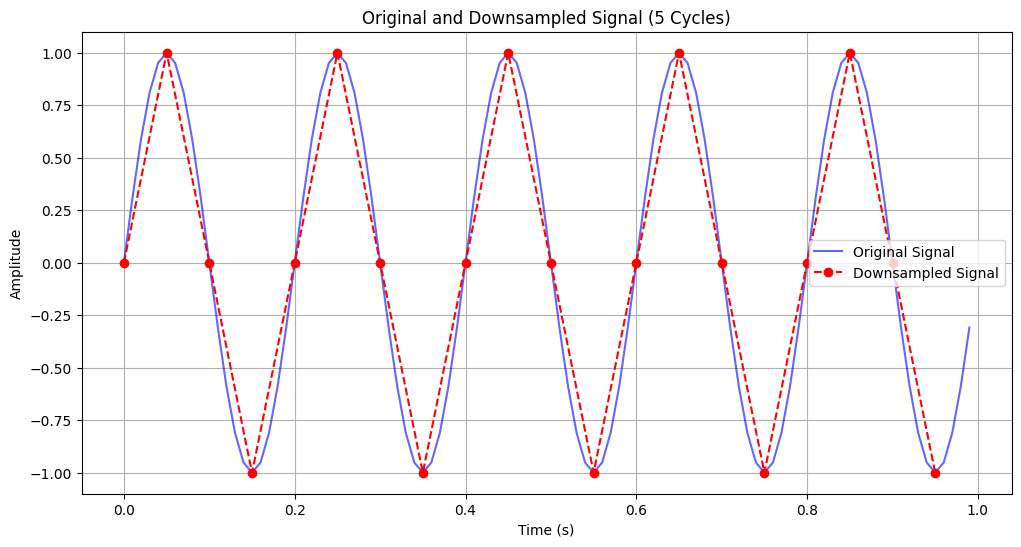

In [16]:
#part 2 of the project.Data Analysis with NumPy, Pandas, and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Function to downsample a sinusoidal signal
def downsample_signal(signal, sampling_interval):
 
    # Downsampled indices (every nth point)
    downsampled_indices = np.arange(0, len(signal), sampling_interval)
    downsampled_signal = signal[downsampled_indices]
    return downsampled_indices, downsampled_signal

# Create a sinusoidal signal with 5 cycles
frequency = 5  # Frequency in Hz
sampling_rate = 0.01  # Time interval between samples
time = np.arange(0, 1, sampling_rate)  # 1 second (for 5 complete cycles)
sinusoidal_signal = np.sin(2 * np.pi * frequency * time)

# Downsample the signal to approximately 20% of its original length
original_length = len(sinusoidal_signal)
target_length = int(0.2 * original_length)
sampling_interval = original_length // target_length

# Apply the downsampling function
downsampled_indices, downsampled_signal = downsample_signal(sinusoidal_signal, sampling_interval)

# Generate the new time array for the downsampled signal
downsampled_time = time[downsampled_indices]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time, sinusoidal_signal, label='Original Signal', color='blue', alpha=0.6)
plt.plot(downsampled_time, downsampled_signal, label='Downsampled Signal', color='red', linestyle='--', marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original and Downsampled Signal (5 Cycles)')
plt.legend()
plt.grid()
plt.show()


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("laptop_price - dataset.csv")

# Display the first few rows of the dataset for understanding its structure
df.head()





,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


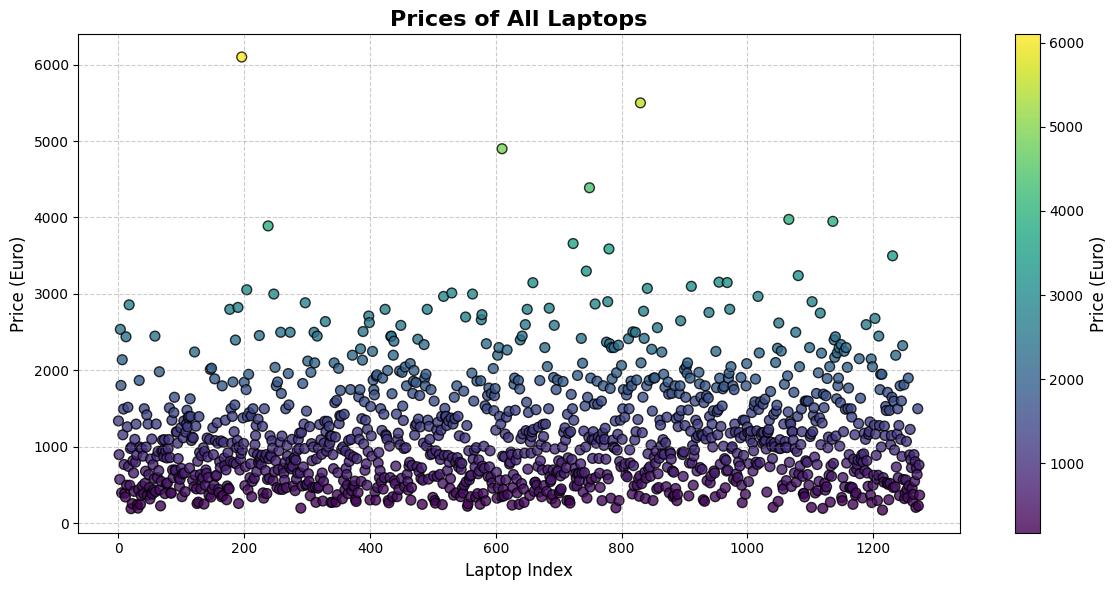

In [ ]:
#  plot of the price of all laptops with diffrent color for each price
plt.figure(figsize=(12, 6))
plt.scatter(
    df.index, df["Price (Euro)"], 
    c=df["Price (Euro)"], 
    cmap="viridis", 
    edgecolor="black", 
    alpha=0.8, 
    s=50
)
plt.title("Prices of All Laptops", fontsize=16, fontweight="bold")
plt.xlabel("Laptop Index", fontsize=12)
plt.ylabel("Price (Euro)", fontsize=12)
cbar = plt.colorbar()
cbar.set_label("Price (Euro)", fontsize=12)
plt.grid(color="gray", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


Average laptop price by company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

Company with the most expensive laptops on average:
Razer with an average price of 3346.14 Euro


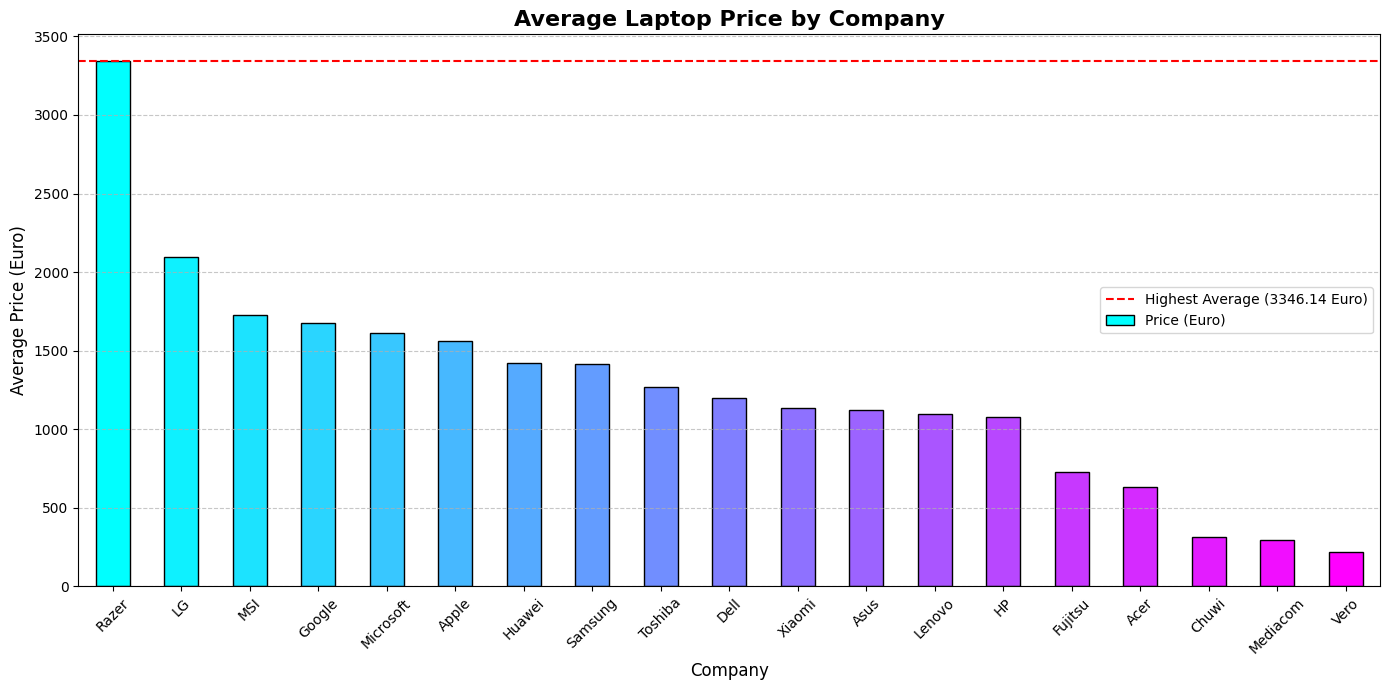

In [30]:
# Calculate the average price for each company
average_prices_by_company = df.groupby("Company")["Price (Euro)"].mean()

# Find the company with the most expensive laptops on average
most_expensive_company = average_prices_by_company.idxmax()
highest_average_price = average_prices_by_company.max()

# Print the results
print("Average laptop price by company:")
print(average_prices_by_company.sort_values(ascending=False))
print("\nCompany with the most expensive laptops on average:")
print(f"{most_expensive_company} with an average price of {highest_average_price:.2f} Euro")

# Creative bar plot for average prices by company
plt.figure(figsize=(14, 7))
colors = plt.cm.cool(np.linspace(0, 1, len(average_prices_by_company)))
average_prices_by_company.sort_values(ascending=False).plot(
    kind="bar", color=colors, edgecolor="black"
)
plt.title("Average Laptop Price by Company", fontsize=16, fontweight="bold")
plt.xlabel("Company", fontsize=12)
plt.ylabel("Average Price (Euro)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Highlight the company with the highest average price
plt.axhline(highest_average_price, color="red", linestyle="--", label=f"Highest Average ({highest_average_price:.2f} Euro)")
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


In [31]:
# Step 1: Standardize the operating systems
df["OpSys"] = df["OpSys"].replace({
    "macOS": "Mac OS",
    "MacOS": "Mac OS",
    "Mac OS X": "Mac OS",
    "No OS": "No Operating System",
    "Windows 10": "Windows",
    "Windows 7": "Windows",
    "Windows 10 S": "Windows"
})

# Find unique operating systems after standardization
unique_operating_systems = df["OpSys"].unique()
print("Unique Operating Systems after standardization:")
print(unique_operating_systems)


Unique Operating Systems after standardization:
['Mac OS' 'No Operating System' 'Windows' 'Linux' 'Android' 'Chrome OS']


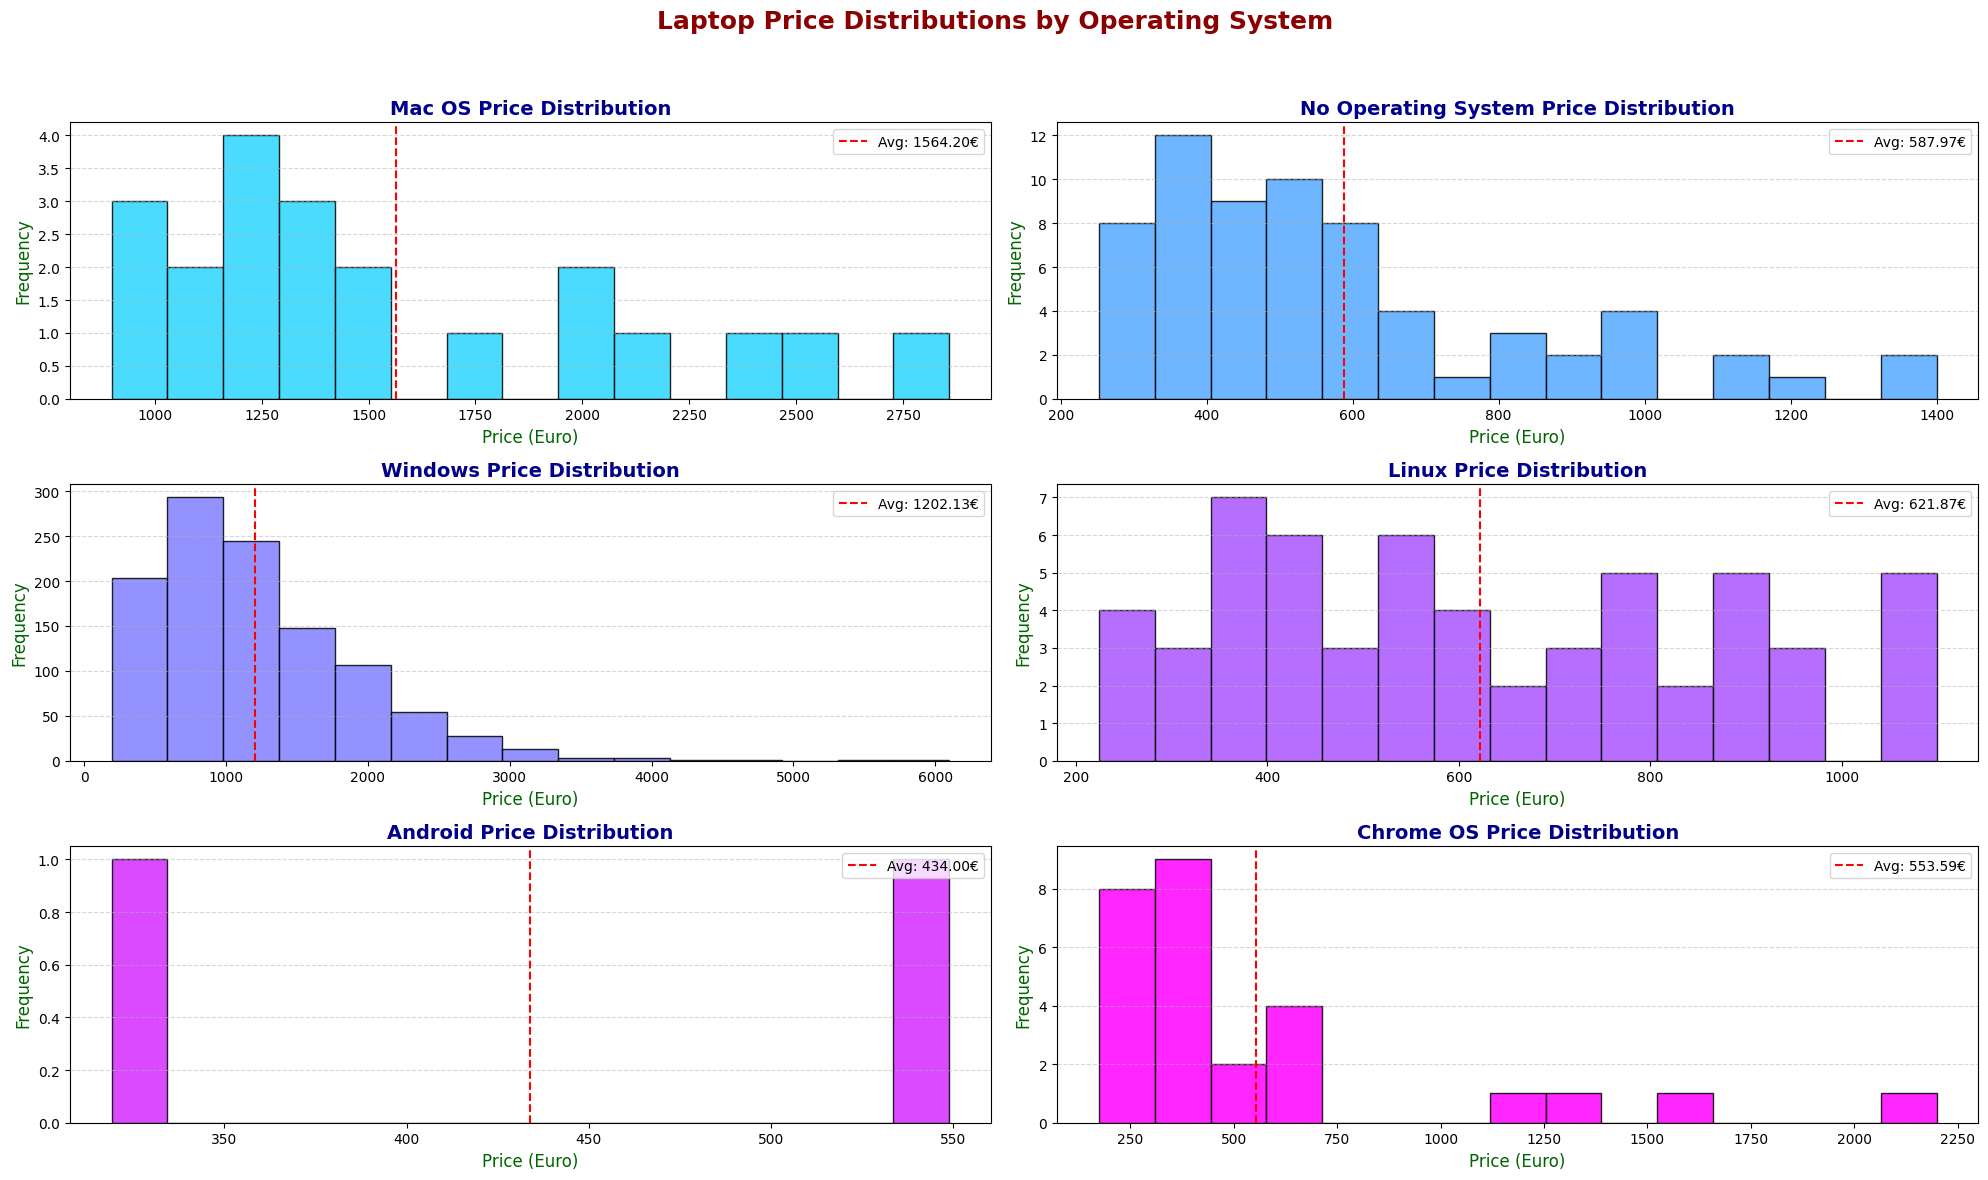

In [34]:
# Creative Plot for Price Distributions by Operating System

#Create a figure with a larger size for better layout
plt.figure(figsize = (20,12))
for i, os_type in enumerate(unique_operating_systems, 1):
    plt.subplot(3, 2, i)  # Arrange subplots in a 3x2 grid
    os_prices = df[df["OpSys"] == os_type]["Price (Euro)"]
    plt.hist(
        os_prices, bins=15, alpha=0.85, color=plt.cm.cool(i / len(unique_operating_systems)), edgecolor="black"
    )
    #add title for every os type.
    plt.title(f"{os_type} Price Distribution", fontsize=14, fontweight="bold", color="darkblue")
    plt.xlabel("Price (Euro)", fontsize=12, color="darkgreen")
    plt.ylabel("Frequency", fontsize=12, color="darkgreen")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    # Add text for average price
    avg_price = os_prices.mean()
    plt.axvline(avg_price, color="red", linestyle="--", linewidth=1.5, label=f"Avg: {avg_price:.2f}€")
    plt.legend(fontsize=10)

# Adjust layout for main title
plt.suptitle("Laptop Price Distributions by Operating System", fontsize=18, fontweight="bold", color="darkred")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.show()


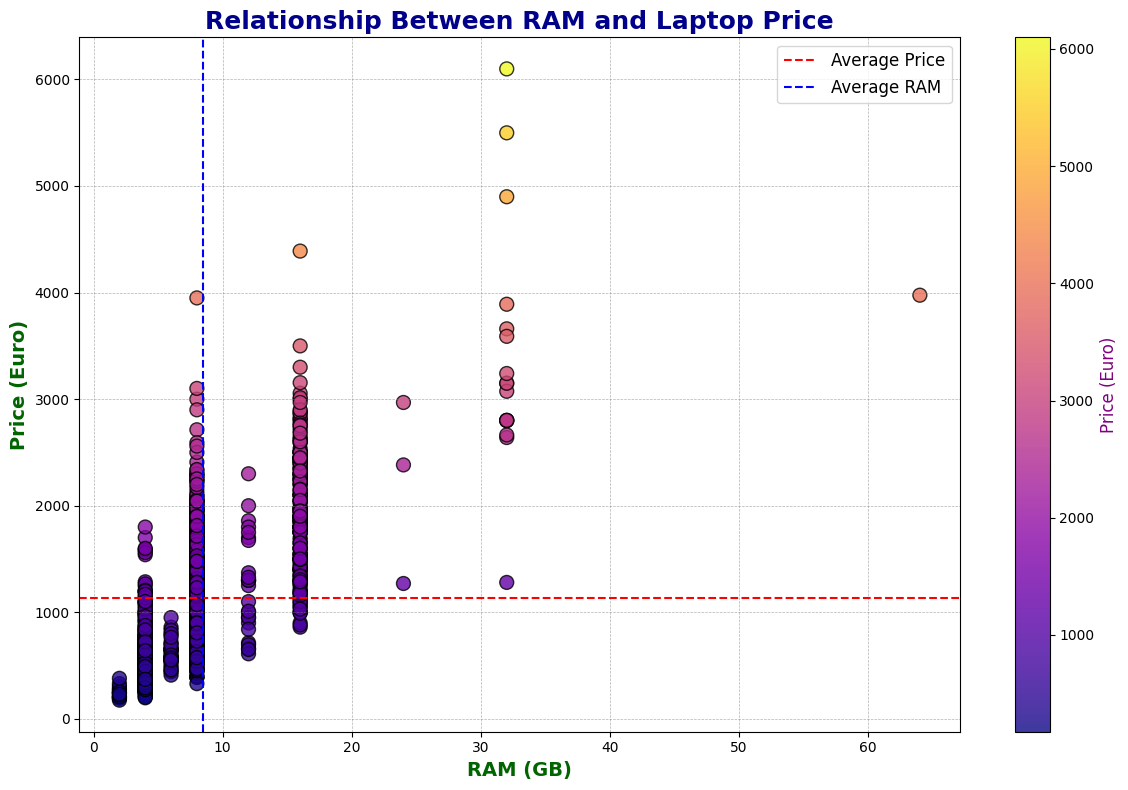

In [ ]:

# Creative Scatter Plot: Relationship between RAM and Computer Price
plt.figure(figsize=(12, 8))

# Scatter plot with a color gradient based on price
scatter = plt.scatter(
    df["RAM (GB)"], df["Price (Euro)"],
    c=df["Price (Euro)"], cmap="plasma", s=100, alpha=0.8, edgecolor="black"
)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Price (Euro)", fontsize=12, color="purple")
cbar.ax.tick_params(labelsize=10)

# Add titles and labels with styling
plt.title("Relationship Between RAM and Laptop Price", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("RAM (GB)", fontsize=14, fontweight="bold", color="darkgreen")
plt.ylabel("Price (Euro)", fontsize=14, fontweight="bold", color="darkgreen")

# Add grid with custom styling
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.6)

# Highlight trend
plt.axhline(df["Price (Euro)"].mean(), color="red", linestyle="--", label="Average Price")
plt.axvline(df["RAM (GB)"].mean(), color="blue", linestyle="--", label="Average RAM")
plt.legend(fontsize=12)

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [36]:
# Create a new column "Storage type" by extracting the type of storage from the "Memory" column
df["Storage type"] = df["Memory"].str.extract(r'(\w+)$')

# Display the first few rows to verify the new column
print("Memory and Storage Type Columns:")
print(df[["Memory", "Storage type"]].head())

# Verify unique storage types
unique_storage_types = df["Storage type"].unique()
print("\nUnique Storage Types:")
print(unique_storage_types)


Memory and Storage Type Columns:
                Memory Storage type
0            128GB SSD          SSD
1  128GB Flash Storage      Storage
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD

Unique Storage Types:
['SSD' 'Storage' 'HDD' 'Hybrid']


In [ ]:
'''1)What is the relationship between laptop weight and price?
Use a scatter plot to visualize the relationship between weight and price.
Highlight laptops with weights above the average weight for additional insights.
2)How does the price distribution vary based on screen size (Inches)?
Categorize laptops into screen size ranges
Use a boxplot to compare the price distribution for each range
3)Which laptop types have the widest range of prices?
Calculate the range (max - min) of prices for each laptop type.
Use a bar chart to visualize the price range for each type.
4)Is there a relationship between screen resolution and price?
Extract screen resolution dimensions from the ScreenResolution column (e.g., width × height).
Analyze the relationship between pixel count (width × height) and price using a scatter plot.
Selected Questions for Implementation:
1)What is the relationship between laptop weight and price?
4)Is there a relationship between screen resolution and price?





In [42]:
pip install seaborn

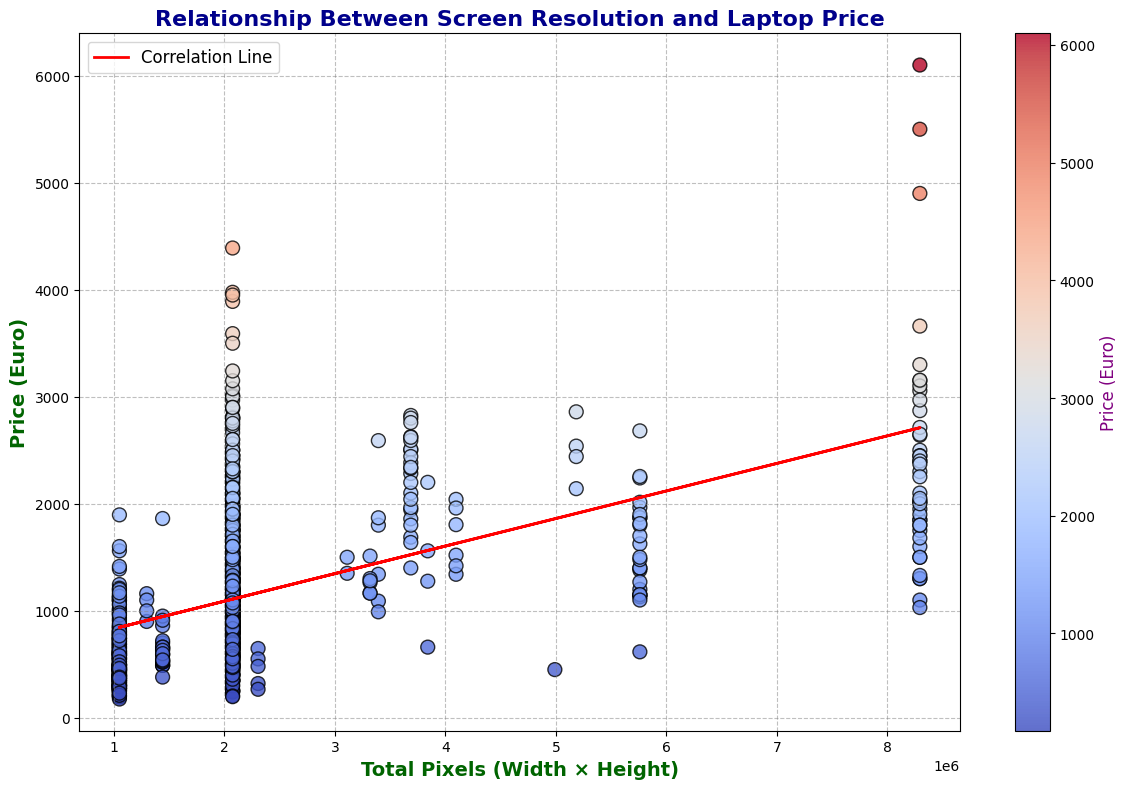

In [ ]:
#question 1- bonus
# Extract screen resolution dimensions (width and height) from the "ScreenResolution" column# 
# Scatter plot: Total Pixels vs. Price with correlation line
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(
    df["Total Pixels"], df["Price (Euro)"], 
    c=df["Price (Euro)"], cmap="coolwarm", alpha=0.8, s=100, edgecolor="black"
)

# Add correlation line (linear regression)
m, b = np.polyfit(df["Total Pixels"], df["Price (Euro)"], 1)  # Linear regression (slope and intercept)
plt.plot(df["Total Pixels"], m * df["Total Pixels"] + b, color="red", linewidth=2, label="Correlation Line")

# Titles and labels
plt.title("Relationship Between Screen Resolution and Laptop Price", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Total Pixels (Width × Height)", fontsize=14, fontweight="bold", color="darkgreen")
plt.ylabel("Price (Euro)", fontsize=14, fontweight="bold", color="darkgreen")

# Add colorbar for price
cbar = plt.colorbar()
cbar.set_label("Price (Euro)", fontsize=12, color="purple")

# Add grid and legend
plt.grid(color="gray", linestyle="--", alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



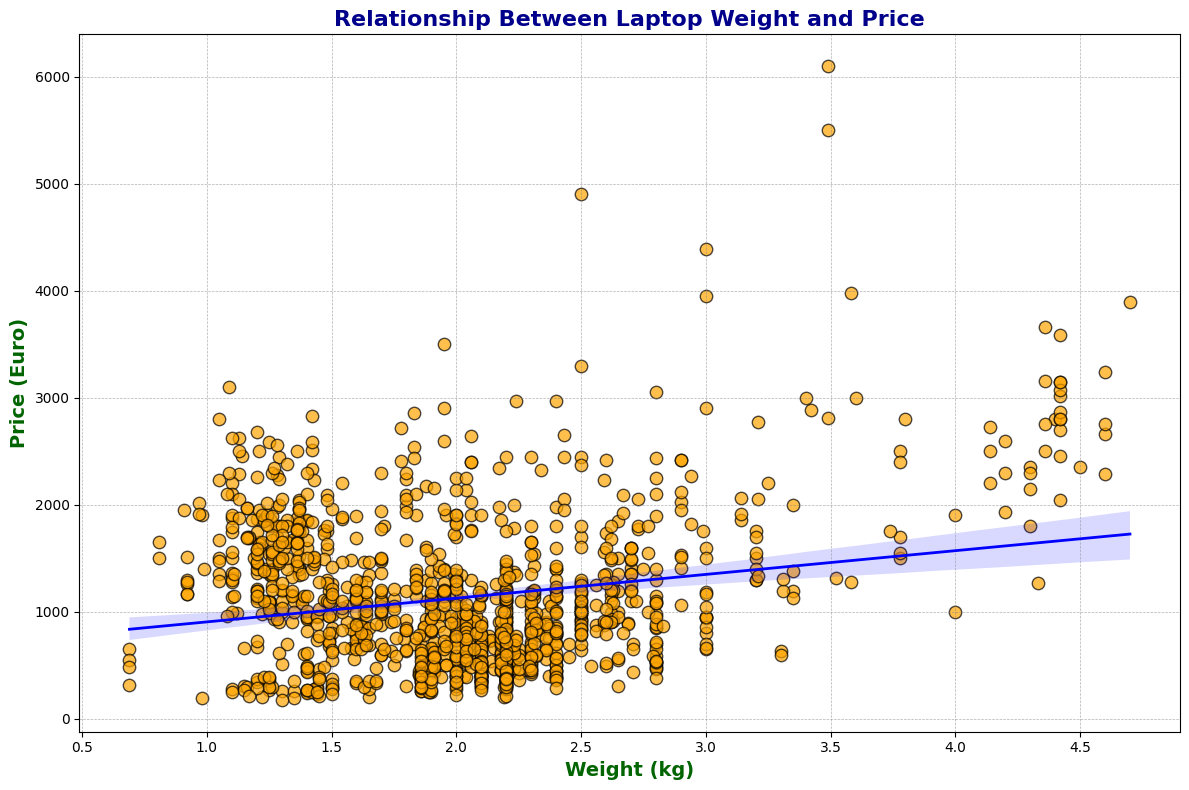

In [47]:
#question 2- bonus

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with a regression line for weight vs. price
plt.figure(figsize=(12, 8))

# Scatter plot and regression line using seaborn
sns.regplot(
    x="Weight (kg)", y="Price (Euro)", data=df, 
    scatter_kws={"alpha": 0.7, "s": 80, "color": "orange", "edgecolor": "black"}, 
    line_kws={"color": "blue", "linewidth": 2}
)

# Titles and labels
plt.title("Relationship Between Laptop Weight and Price", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Weight (kg)", fontsize=14, fontweight="bold", color="darkgreen")
plt.ylabel("Price (Euro)", fontsize=14, fontweight="bold", color="darkgreen")

# Grid with styling
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()
